### **Import Libraries**

In [33]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks, RandomUnderSampler

from lightgbm import LGBMClassifier

### **Load Dataset**

In [2]:
df_train = pd.read_csv(r'D:\Project\Python\Portfolio\Big Data\[Bottleneck] CLS - Spring Leaf Markeing Response\data\train.csv')
df_test = pd.read_csv(r'D:\Project\Python\Portfolio\Big Data\[Bottleneck] CLS - Spring Leaf Markeing Response\data\test.csv')

display(df_train.head())
display(df_test.head())

C:\Users\msi.pc\AppData\Local\Temp\ipykernel_2396\1655325384.py:1: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(r'D:\Project\Python\Portfolio\Big Data\[Bottleneck] CLS - Spring Leaf Markeing Response\data\train.csv')
C:\Users\msi.pc\AppData\Local\Temp\ipykernel_2396\1655325384.py:2: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv(r'D:\Project\Python\Portfolio\Big Data\[Bottleneck] CLS - Spring Leaf Markeing Response\data\test.csv')


,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934
0,1,R,360,25,2251,B,2.0,2.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
1,3,R,74,192,3274,C,2.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
2,6,R,21,36,3500,C,1.0,1.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
3,9,R,8,2,1500,B,0.0,0.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS
4,10,H,91,39,84500,C,8.0,3.0,False,False,...,0,98,98,998,999999998,998,998,9998,9998,IAPS


In [3]:
print(f'Train dataset shape: {df_train.shape}')
print(f'Test dataset shape: {df_test.shape}')

Train dataset shape: (145231, 1934)
Test dataset shape: (145232, 1933)


In [4]:
df_train.info(memory_usage='deep')
df_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145231 entries, 0 to 145230
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 2.3 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145232 entries, 0 to 145231
Columns: 1933 entries, ID to VAR_1934
dtypes: float64(477), int64(1405), object(51)
memory usage: 2.3 GB


In [5]:
df_train_int_cols = df_train.select_dtypes('int64').columns
df_train_float_cols = df_train.select_dtypes('float64').columns
df_test_int_cols = df_test.select_dtypes('int64').columns
df_test_float_cols = df_test.select_dtypes('float64').columns

df_train_int_cols = {col: 'int32' for col in df_train_int_cols}
df_train_float_cols = {col: 'float32' for col in df_train_float_cols}
df_test_int_cols = {col: 'int32' for col in df_test_int_cols}
df_test_float_cols = {col: 'float32' for col in df_test_float_cols}

df_train = df_train.astype(df_train_int_cols)
df_train = df_train.astype(df_train_float_cols)
df_test = df_test.astype(df_test_int_cols)
df_test = df_test.astype(df_test_float_cols)

In [6]:
df_train.info(memory_usage='deep')
df_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145231 entries, 0 to 145230
Columns: 1934 entries, ID to target
dtypes: float32(477), int32(1406), object(51)
memory usage: 1.3 GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145232 entries, 0 to 145231
Columns: 1933 entries, ID to VAR_1934
dtypes: float32(477), int32(1405), object(51)
memory usage: 1.3 GB


### **EDA**

<Axes: >

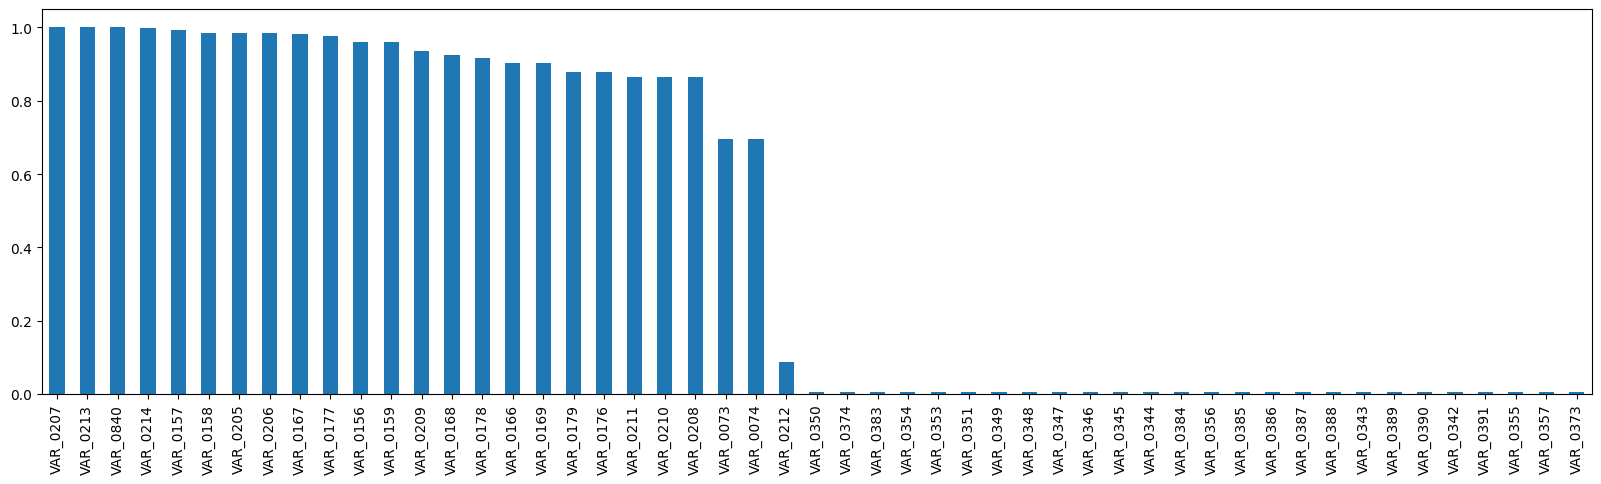

In [7]:
df_train_null_cols = df_train.isna().mean().sort_values(ascending=False)
df_train_null_cols[:51].plot(kind='bar', figsize=(20, 5))

In [8]:
df_train_null_cols_70p = df_train_null_cols[df_train_null_cols > 0.6]
df_train_null_cols_70p = df_train_null_cols_70p.index
df_train_null_cols_70p

Index(['VAR_0207', 'VAR_0213', 'VAR_0840', 'VAR_0214', 'VAR_0157', 'VAR_0158',
       'VAR_0205', 'VAR_0206', 'VAR_0167', 'VAR_0177', 'VAR_0156', 'VAR_0159',
       'VAR_0209', 'VAR_0168', 'VAR_0178', 'VAR_0166', 'VAR_0169', 'VAR_0179',
       'VAR_0176', 'VAR_0211', 'VAR_0210', 'VAR_0208', 'VAR_0073', 'VAR_0074'],
      dtype='object')

<Axes: >

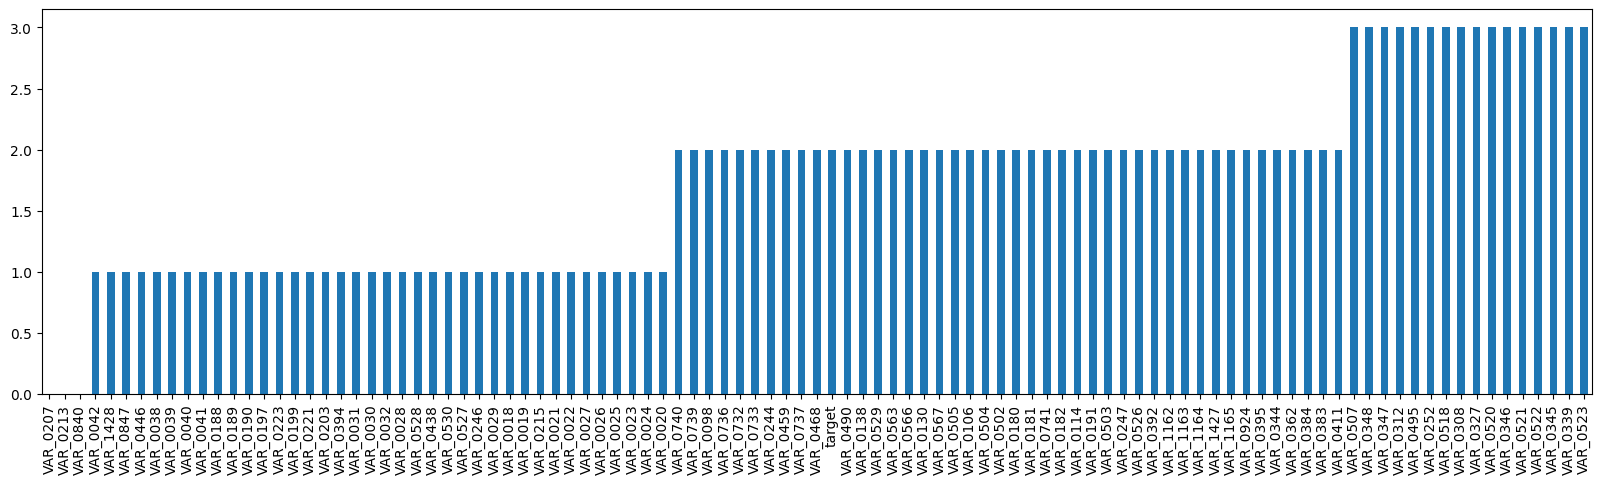

In [9]:
df_train_num_cols_low_var = df_train.select_dtypes(exclude=['object']).nunique().sort_values()
df_train_num_cols_low_var[:101].plot(kind='bar', figsize=(20, 5))

In [10]:
df_train_num_cols_single = df_train_num_cols_low_var[df_train_num_cols_low_var <= 1]
df_train_num_cols_single = df_train_num_cols_single.index
df_train_num_cols_single

Index(['VAR_0207', 'VAR_0213', 'VAR_0840', 'VAR_0042', 'VAR_1428', 'VAR_0847',
       'VAR_0446', 'VAR_0038', 'VAR_0039', 'VAR_0040', 'VAR_0041', 'VAR_0188',
       'VAR_0189', 'VAR_0190', 'VAR_0197', 'VAR_0223', 'VAR_0199', 'VAR_0221',
       'VAR_0203', 'VAR_0394', 'VAR_0031', 'VAR_0030', 'VAR_0032', 'VAR_0028',
       'VAR_0528', 'VAR_0438', 'VAR_0530', 'VAR_0527', 'VAR_0246', 'VAR_0029',
       'VAR_0018', 'VAR_0019', 'VAR_0215', 'VAR_0021', 'VAR_0022', 'VAR_0027',
       'VAR_0026', 'VAR_0025', 'VAR_0023', 'VAR_0024', 'VAR_0020'],
      dtype='object')

In [32]:
df_train_cat_cols = df_train.select_dtypes('object')
df_train_cat_cols

,VAR_0001,VAR_0005,VAR_0008,VAR_0009,VAR_0010,VAR_0011,VAR_0012,VAR_0043,VAR_0044,VAR_0073,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,H,C,False,False,False,False,False,False,[],NaN,...,-1,CF,O,U,O,CHIEF EXECUTIVE OFFICER,-1,-1,COMMUNITY ASSOCIATION MANAGER,IAPS
1,H,B,False,False,False,False,False,False,[],04SEP12:00:00:00,...,H,EC,O,R,R,-1,I,Discharged,-1,IAPS
2,H,C,False,False,False,False,False,False,[],NaN,...,R,UU,R,R,-1,-1,-1,-1,-1,IAPS
3,H,C,False,False,False,False,False,False,[],NaN,...,H,-1,R,R,-1,-1,-1,-1,-1,RCC
4,R,N,False,False,False,False,False,False,[],NaN,...,S,-1,R,U,O,-1,-1,-1,-1,BRANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145226,H,C,False,False,False,False,False,False,[],16MAY12:00:00:00,...,S,-1,R,U,R,-1,-1,-1,-1,BRANCH
145227,R,C,False,False,False,False,False,False,[],22MAY12:00:00:00,...,S,BE,R,U,R,-1,I,Discharged,-1,IAPS
145228,R,B,False,False,False,False,False,False,[],07MAY12:00:00:00,...,P,CC,U,R,-1,-1,-1,-1,-1,BRANCH
145229,H,C,False,False,False,False,False,False,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IAPS


<Axes: >

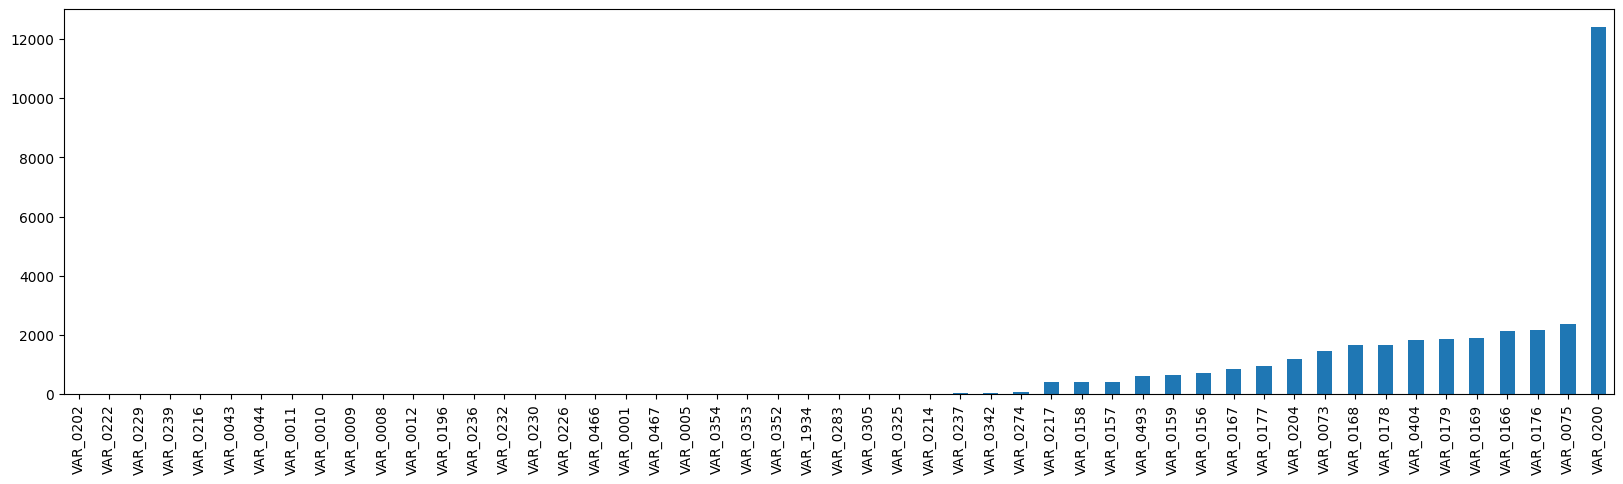

In [12]:
df_train_cat_cols_unique = df_train_cat_cols.nunique().sort_values()
df_train_cat_cols_unique.plot(kind='bar', figsize=(20, 5))

In [15]:
df_train_cat_cols_single = df_train_cat_cols_unique[df_train_cat_cols_unique == 1]
df_train_cat_cols_single = df_train_cat_cols_single.index
df_train_cat_cols_single

Index(['VAR_0202', 'VAR_0222', 'VAR_0229', 'VAR_0239', 'VAR_0216', 'VAR_0043',
       'VAR_0044', 'VAR_0011', 'VAR_0010', 'VAR_0009', 'VAR_0008', 'VAR_0012',
       'VAR_0196'],
      dtype='object')

### **Feature Engineering**

##### **A. Split data**

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train.drop(columns=['ID', 'target'],axis=1),
                                                      df_train['target'],
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=df_train['target'])
X_test = df_test

X_train.shape, X_valid.shape

((116184, 1932), (29047, 1932))

##### **A. Drop columns**

In [16]:
columns_to_drop = set(df_train_null_cols_70p.tolist() + df_train_num_cols_single.tolist() + df_train_cat_cols_single.tolist())

X_train.drop(columns=columns_to_drop, inplace=True)
X_valid.drop(columns=columns_to_drop, inplace=True)
X_test.drop(columns=columns_to_drop, inplace=True)

In [17]:
print(f'Train feature shape: {X_train.shape}')
print(f'Valid feature shape: {X_valid.shape}')
print(f'Test dataset shape: {df_test.shape}')

Train feature shape: (116184, 1857)
Valid feature shape: (29047, 1857)
Test dataset shape: (145232, 1858)


##### **B. Drop duplicates**

In [18]:
print(f'Numbers of duplicated in X_train: {X_train.duplicated().sum()}')
print(f'Numbers of duplicated in X_valid: {X_valid.duplicated().sum()}')
print(f'Numbers of duplicated in X_test: {X_test.duplicated().sum()}')

Numbers of duplicated in X_train: 0
Numbers of duplicated in X_valid: 0
Numbers of duplicated in X_test: 0


##### **C. Impute missing value**

In [19]:
cat_col_names = X_train.select_dtypes('object').columns

In [20]:
X_train_cat_cols_null = X_train[cat_col_names].isna().sum()
X_train_cat_cols_null = X_train_cat_cols_null[X_train_cat_cols_null >= 1]

X_valid_cat_cols_null = X_valid[cat_col_names].isna().sum()
X_valid_cat_cols_null = X_valid_cat_cols_null[X_valid_cat_cols_null >= 1]

X_test_cat_cols_null = X_test[cat_col_names].isna().sum()
X_test_cat_cols_null = X_test_cat_cols_null[X_test_cat_cols_null >= 1]

print(f'X_train cat columns null: \n{X_train_cat_cols_null} \n')
print(f'X_valid cat columns null: \n{X_valid_cat_cols_null} \n')
print(f'X_test cat columns null: \n{X_test_cat_cols_null} \n')

X_train cat columns null: 
VAR_0075     45
VAR_0200     48
VAR_0204     45
VAR_0217     45
VAR_0226     45
VAR_0230     45
VAR_0232     45
VAR_0236     45
VAR_0237     45
VAR_0274    722
VAR_0283    722
VAR_0305    722
VAR_0325    722
VAR_0342    722
VAR_0352    722
VAR_0353    722
VAR_0354    722
VAR_0404    722
VAR_0466    722
VAR_0467    722
VAR_0493    722
dtype: int64 

X_valid cat columns null: 
VAR_0075     11
VAR_0200     12
VAR_0204     11
VAR_0217     11
VAR_0226     11
VAR_0230     11
VAR_0232     11
VAR_0236     11
VAR_0237     11
VAR_0274    196
VAR_0283    196
VAR_0305    196
VAR_0325    196
VAR_0342    196
VAR_0352    196
VAR_0353    196
VAR_0354    196
VAR_0404    196
VAR_0466    196
VAR_0467    196
VAR_0493    196
dtype: int64 

X_test cat columns null: 
VAR_0075     48
VAR_0200     51
VAR_0204     48
VAR_0217     48
VAR_0226     48
VAR_0230     48
VAR_0232     48
VAR_0236     48
VAR_0237     48
VAR_0274    909
VAR_0283    909
VAR_0305    909
VAR_0325    909
VAR_0342  

In [21]:
X_train_cat_modes = X_train[cat_col_names].mode().iloc[0]

X_train[X_train_cat_cols_null.index] = X_train[X_train_cat_cols_null.index].apply(lambda col: col.fillna(X_train_cat_modes[col.name]))
X_valid[X_valid_cat_cols_null.index] = X_valid[X_valid_cat_cols_null.index].apply(lambda col: col.fillna(X_train_cat_modes[col.name]))
X_test[X_test_cat_cols_null.index] = X_test[X_test_cat_cols_null.index].apply(lambda col: col.fillna(X_train_cat_modes[col.name]))

print(f'X_train cat columns null:\n{X_train[X_train_cat_cols_null.index].isna().sum()}')
print(f'X_valid cat columns null:\n{X_valid[X_valid_cat_cols_null.index].isna().sum()}')
print(f'X_test cat columns null:\n{X_test[X_train_cat_cols_null.index].isna().sum()}')

X_train cat columns null:
VAR_0075    0
VAR_0200    0
VAR_0204    0
VAR_0217    0
VAR_0226    0
VAR_0230    0
VAR_0232    0
VAR_0236    0
VAR_0237    0
VAR_0274    0
VAR_0283    0
VAR_0305    0
VAR_0325    0
VAR_0342    0
VAR_0352    0
VAR_0353    0
VAR_0354    0
VAR_0404    0
VAR_0466    0
VAR_0467    0
VAR_0493    0
dtype: int64
X_valid cat columns null:
VAR_0075    0
VAR_0200    0
VAR_0204    0
VAR_0217    0
VAR_0226    0
VAR_0230    0
VAR_0232    0
VAR_0236    0
VAR_0237    0
VAR_0274    0
VAR_0283    0
VAR_0305    0
VAR_0325    0
VAR_0342    0
VAR_0352    0
VAR_0353    0
VAR_0354    0
VAR_0404    0
VAR_0466    0
VAR_0467    0
VAR_0493    0
dtype: int64
X_test cat columns null:
VAR_0075    0
VAR_0200    0
VAR_0204    0
VAR_0217    0
VAR_0226    0
VAR_0230    0
VAR_0232    0
VAR_0236    0
VAR_0237    0
VAR_0274    0
VAR_0283    0
VAR_0305    0
VAR_0325    0
VAR_0342    0
VAR_0352    0
VAR_0353    0
VAR_0354    0
VAR_0404    0
VAR_0466    0
VAR_0467    0
VAR_0493    0
dtype: int64


In [22]:
num_col_names = X_train.select_dtypes(exclude='object').columns

In [23]:
X_train_num_cols_null = X_train[num_col_names].isna().sum()
X_train_num_cols_null = X_train_num_cols_null[X_train_num_cols_null >= 1]

X_valid_num_cols_null = X_valid[num_col_names].isna().sum()
X_valid_num_cols_null = X_valid_num_cols_null[X_valid_num_cols_null >= 1]

X_test_num_cols_null = X_test[num_col_names].isna().sum()
X_test_num_cols_null = X_test_num_cols_null[X_test_num_cols_null >= 1]

print(f'X_train num columns null: \n{X_train_num_cols_null} \n')
print(f'X_valid num columns null: \n{X_valid_num_cols_null} \n')
print(f'X_test num columns null: \n{X_test_num_cols_null} \n')

X_train num columns null: 
VAR_0006     45
VAR_0007     45
VAR_0013     45
VAR_0014     45
VAR_0015     45
           ... 
VAR_0524    722
VAR_0525    722
VAR_0526    721
VAR_0529    721
VAR_0531    721
Length: 431, dtype: int64 

X_valid num columns null: 
VAR_0006     11
VAR_0007     11
VAR_0013     11
VAR_0014     11
VAR_0015     11
           ... 
VAR_0524    196
VAR_0525    196
VAR_0526    196
VAR_0529    196
VAR_0531    196
Length: 431, dtype: int64 

X_test num columns null: 
VAR_0006     48
VAR_0007     48
VAR_0013     48
VAR_0014     48
VAR_0015     48
           ... 
VAR_0524    909
VAR_0525    909
VAR_0526    909
VAR_0529    909
VAR_0531    909
Length: 431, dtype: int64 



In [24]:
X_train_num_med = X_train[num_col_names].median()

X_train[X_train_num_cols_null.index] = X_train[X_train_num_cols_null.index].apply(lambda col: col.fillna(X_train_num_med[col.name]))
X_valid[X_valid_num_cols_null.index] = X_valid[X_valid_num_cols_null.index].apply(lambda col: col.fillna(X_train_num_med[col.name]))
X_test[X_test_num_cols_null.index] = X_test[X_test_num_cols_null.index].apply(lambda col: col.fillna(X_train_num_med[col.name]))

print(f'X_train num columns null:\n{X_train[X_train_num_cols_null.index].isna().sum()}')
print(f'X_valid num columns null:\n{X_valid[X_valid_num_cols_null.index].isna().sum()}')
print(f'X_test num columns null:\n{X_test[X_train_num_cols_null.index].isna().sum()}')

X_train num columns null:
VAR_0006    0
VAR_0007    0
VAR_0013    0
VAR_0014    0
VAR_0015    0
           ..
VAR_0524    0
VAR_0525    0
VAR_0526    0
VAR_0529    0
VAR_0531    0
Length: 431, dtype: int64
X_valid num columns null:
VAR_0006    0
VAR_0007    0
VAR_0013    0
VAR_0014    0
VAR_0015    0
           ..
VAR_0524    0
VAR_0525    0
VAR_0526    0
VAR_0529    0
VAR_0531    0
Length: 431, dtype: int64
X_test num columns null:
VAR_0006    0
VAR_0007    0
VAR_0013    0
VAR_0014    0
VAR_0015    0
           ..
VAR_0524    0
VAR_0525    0
VAR_0526    0
VAR_0529    0
VAR_0531    0
Length: 431, dtype: int64


##### **D. Categorical encoding**

In [47]:
encoder = LabelEncoder()

for col in cat_col_names:
  X_train[col] = encoder.fit_transform(X_train[col])
  X_valid[col] = encoder.transform(X_valid[col])

In [48]:
display(X_train[cat_col_names].head())
display(X_valid[cat_col_names].head())
display(X_test[cat_col_names].head())

,VAR_0001,VAR_0005,VAR_0075,VAR_0200,VAR_0204,VAR_0217,VAR_0226,VAR_0230,VAR_0232,VAR_0236,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
122461,0,1,1350,7800,758,229,0,0,1,1,...,3,32,1,2,1,1,0,0,0,2
134357,0,0,838,5706,1109,142,0,0,1,1,...,7,0,3,3,3,1,0,0,0,2
92261,2,0,499,4294,813,84,0,0,1,1,...,3,40,2,2,2,1,0,0,0,0
87032,2,1,441,7415,1091,64,0,0,0,1,...,7,41,3,1,2,1,0,0,372,2
87642,2,1,2212,10480,47,245,0,0,0,1,...,3,30,3,2,1,1,1,2,0,2


,VAR_0001,VAR_0005,VAR_0075,VAR_0200,VAR_0204,VAR_0217,VAR_0226,VAR_0230,VAR_0232,VAR_0236,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
109076,0,1,484,4258,599,26,0,0,0,1,...,0,41,1,3,3,0,0,0,0,2
71792,2,2,641,416,54,258,0,0,0,1,...,7,41,2,3,2,0,0,0,0,2
57472,0,1,726,2563,699,8,0,0,0,1,...,5,48,2,2,0,0,0,0,0,2
50049,2,2,1732,3134,81,362,0,0,1,1,...,0,0,3,0,0,0,0,0,0,3
140960,0,1,865,4826,128,179,0,0,1,1,...,7,32,1,1,3,0,0,0,0,0


,VAR_0001,VAR_0005,VAR_0075,VAR_0200,VAR_0204,VAR_0217,VAR_0226,VAR_0230,VAR_0232,VAR_0236,...,VAR_0325,VAR_0342,VAR_0352,VAR_0353,VAR_0354,VAR_0404,VAR_0466,VAR_0467,VAR_0493,VAR_1934
0,2,0,18OCT10:00:00:00,CONETOE,29JAN14:21:34:00,10NOV11:02:00:00,False,False,False,True,...,-1,-1,U,U,R,-1,-1,-1,-1,IAPS
1,2,1,18SEP09:00:00:00,NEW IBERIA,29JAN14:23:34:00,05DEC11:02:00:00,False,False,False,True,...,H,FF,O,R,U,-1,-1,-1,-1,IAPS
2,2,1,27JUL12:00:00:00,ELGIN,31JAN14:17:41:00,28JUL12:02:00:00,False,False,False,True,...,S,DD,U,U,U,-1,I,Discharged,-1,IAPS
3,2,0,07MAR12:00:00:00,LEWISBURG,30JAN14:18:30:00,07MAR12:02:00:00,False,False,True,True,...,S,CD,U,U,R,-1,-1,-1,-1,IAPS
4,0,1,17MAY12:00:00:00,COVINGTON,31JAN14:21:50:00,02SEP12:02:00:00,False,False,False,True,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IAPS


##### **E. Handle imbalance data**

In [49]:
y_train.value_counts()

target
0    89166
1    27018
Name: count, dtype: int64

In [50]:
rus_rand = RandomUnderSampler(random_state=42, replacement=False)
X_train, y_train = rus_rand.fit_resample(X_train, y_train)

X_train.shape, y_train.shape

((54036, 1857), (54036,))

In [51]:
y_train.value_counts()

target
0    27018
1    27018
Name: count, dtype: int64

##### **F. Scaling data**

In [52]:
scaler = RobustScaler()
X_train[num_col_names] = scaler.fit_transform(X_train[num_col_names])
X_valid[num_col_names] = scaler.transform(X_valid[num_col_names])
X_test[num_col_names] = scaler.transform(X_test[num_col_names])

### **Model preparation**

In [53]:
lgbm_clf = LGBMClassifier(objective='binary', metric='auc')

### **Model training**

In [54]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 27018, number of negative: 27018
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.961543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160792
[LightGBM] [Info] Number of data points in the train set: 54036, number of used features: 1832
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(metric='auc', objective='binary')

### **Model evaluation**

In [55]:
y_pred_proba = lgbm_clf.predict_proba(X_valid)[:, 1]

auc_roc = roc_auc_score(y_valid, y_pred_proba)
print(f'AUC-ROC Score: {auc_roc}')

AUC-ROC Score: 0.7816681903058297
